# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D<(Ax−y)^T(Ax−y)> $$
$$ D<uv>\;= uDv+vDu,\;u = (Ax−y)\;и\;v=(Ax−y) $$
$$ D_f(x) = 2(Ax−y)^TD(Ax−y) $$
$$ D(Ax) = Adx\;=>\;D(Ax−y) = Adx $$
$$ D_f(x) = 2(Ax−y)^TAdx$$
$$ \nabla f(x) = \frac{D_f(x)}{dx} = 2A^T(Ax−y) $$
$$ \nabla f(x) = 2A^T(Ax−y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax−y) = 0$$
$$ 2A^T(Ax−y) = 0 $$
$$ A^T(Ax−y)=0 $$
$$ A^TAx−A^Ty = 0 $$
$$ A^TAx=A^Ty $$
$$ x = (A^TA)^{−1}A^Ty $$

### 2.1 Реализация прямого решения

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Искомые параметры: a = -1.1, b = 11.0


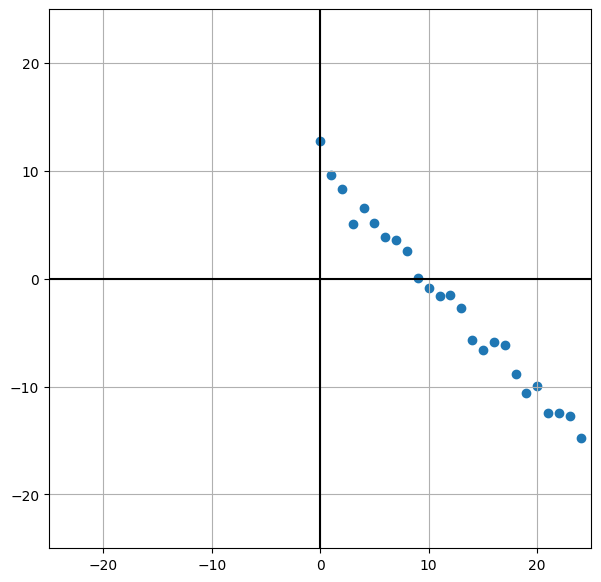

In [3]:
# ваши параметры по вариантам
n = 11
a_orig = (-1)**n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n * (-1)**(n+1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = n

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])
print(f"Искомые параметры: a = {a_orig:.1f}, b = {b_orig:.1f}")

np.random.seed(random_state)

#матрица А с добавлением вектора единиц справа к иксу
A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [35]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 12.74945474,   9.613927  ,   8.31543487,   5.04668144,
          6.59171537,   5.18036864,   3.86337064,   3.61540267,
          2.62105072,   0.03439702,  -0.88623967,  -1.57573349,
         -1.51031769,  -2.73880782,  -5.70554851,  -6.61947526,
         -5.86316261,  -6.12536593,  -8.83107509, -10.58344663,
         -9.9043703 , -12.40957664, -12.47424778, -12.75092837,
        -14.76992018]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - для реализации линейной регрессии со свободным членом b. Общий вид линейной модели: y = ax + b (a - коэффициент наклона, b - свободный член). Вектор единиц позволяет модели иметь этот свободный член, что дает смещение регрессии по вертикали и улучшает соответствие данным 

Аналитическое решение (a, b): [-1.05625779 10.47043698]
Уравнение прямой: y = -1.0563x + 10.4704


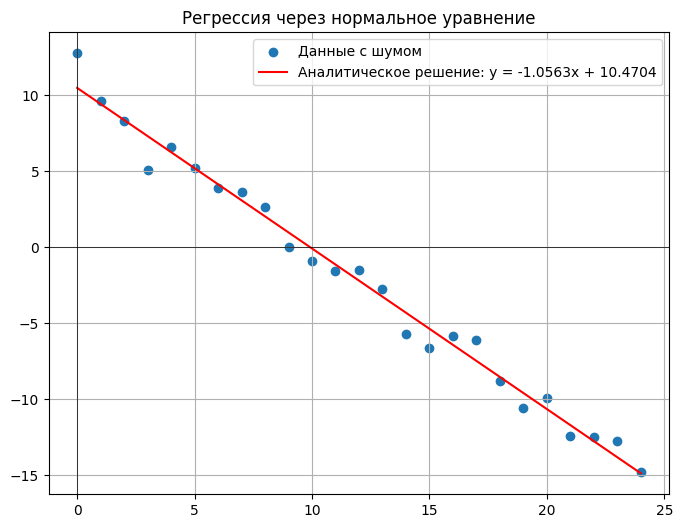

array([-1.05625779, 10.47043698])

In [4]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y

print("Аналитическое решение (a, b):", a_b_analytical)
print(f"Уравнение прямой: y = {a_b_analytical[0]:.4f}x + {a_b_analytical[1]:.4f}")

# Визуализация решения
plt.figure(figsize=(8, 6))
plt.scatter(A[:, 0], y, label='Данные с шумом')
plt.plot(A[:, 0], A @ a_b_analytical, 'r-', 
         label=f'Аналитическое решение: y = {a_b_analytical[0]:.4f}x + {a_b_analytical[1]:.4f}')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title('Регрессия через нормальное уравнение')
plt.show()

a_b_analytical

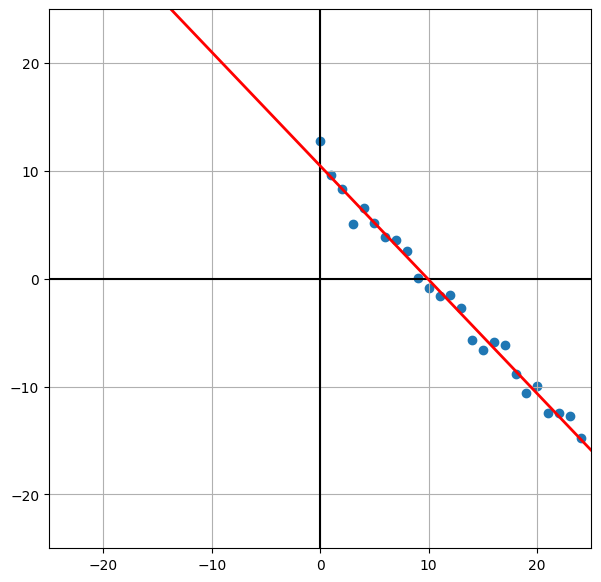

In [5]:
# постройте линию которая вышла рядом с изначальными данными
# Полученные параметры регрессии
a, b = -1.05625779, 10.47043698

# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам

# Вычисляем y для x=-25 и x=25 по уравнению y = a*x + b
x1, x2 = -25, 25
y1 = a * x1 + b
y2 = a * x2 + b

ax.plot([x1, x2], [y1, y2], 'r-', linewidth=2, 
        label=f'Регрессия: y = {a:.2f}x + {b:.2f}')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

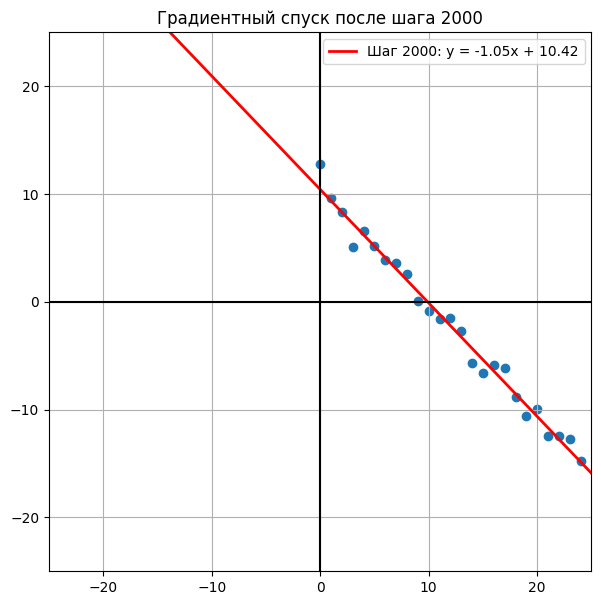

Шаг 2000: a = -1.0530, b = 10.4177

Аналитическое решение: a = -1.0563, b = 10.4704


In [12]:
alpha = 0.0002  # Увеличили шаг обучения
current_params = np.array([0.0, 0.0])  # Переименовали переменную

for i in range(2000):
    # Получаем градиент (без деления на len(y))
    grad = 2 * A.T @ (A @ current_params - y)
    # Обновляем параметры
    current_params -= alpha * grad  # Упростили до одной операции
    
    # Рисуем результат текущего шага
plt.figure(figsize=(7, 7))
plt.scatter(A[:, 0], y)
# Вычисляем точки для линии
x1, x2 = -25, 25
y1 = current_params[0] * x1 + current_params[1]
y2 = current_params[0] * x2 + current_params[1]

# Линия, которая обучилась
plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2,
        label=f'Шаг {i+1}: y = {current_params[0]:.2f}x + {current_params[1]:.2f}')
    
# Настройки графика
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.grid(True)
plt.title(f'Градиентный спуск после шага {i+1}')
plt.legend()
plt.show()

print(f'Шаг {i+1}: a = {current_params[0]:.4f}, b = {current_params[1]:.4f}')

# Для сравнения выведем аналитическое решение
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
print(f"\nАналитическое решение: a = {a_b_analytical[0]:.4f}, b = {a_b_analytical[1]:.4f}")